In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('iris.csv',header=None)

In [3]:
df.head()
print(df[4].value_counts())
# df

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: 4, dtype: int64


In [4]:
df[4] = df[4].replace({'Iris-setosa':1,'Iris-virginica':2,'Iris-versicolor':3})

In [5]:
df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [6]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [7]:
from sklearn.model_selection import train_test_split as tts

In [8]:
x_train,x_test,y_train,y_test = tts(x,y,test_size = .33)

In [9]:
x_train,x_test,y_train,y_test

(       0    1    2    3
 33   5.5  4.2  1.4  0.2
 117  7.7  3.8  6.7  2.2
 81   5.5  2.4  3.7  1.0
 111  6.4  2.7  5.3  1.9
 118  7.7  2.6  6.9  2.3
 ..   ...  ...  ...  ...
 85   6.0  3.4  4.5  1.6
 107  7.3  2.9  6.3  1.8
 69   5.6  2.5  3.9  1.1
 3    4.6  3.1  1.5  0.2
 62   6.0  2.2  4.0  1.0
 
 [100 rows x 4 columns],
        0    1    2    3
 34   4.9  3.1  1.5  0.1
 140  6.7  3.1  5.6  2.4
 54   6.5  2.8  4.6  1.5
 103  6.3  2.9  5.6  1.8
 7    5.0  3.4  1.5  0.2
 87   6.3  2.3  4.4  1.3
 46   5.1  3.8  1.6  0.2
 127  6.1  3.0  4.9  1.8
 1    4.9  3.0  1.4  0.2
 6    4.6  3.4  1.4  0.3
 80   5.5  2.4  3.8  1.1
 56   6.3  3.3  4.7  1.6
 10   5.4  3.7  1.5  0.2
 142  5.8  2.7  5.1  1.9
 147  6.5  3.0  5.2  2.0
 104  6.5  3.0  5.8  2.2
 99   5.7  2.8  4.1  1.3
 37   4.9  3.1  1.5  0.1
 88   5.6  3.0  4.1  1.3
 64   5.6  2.9  3.6  1.3
 73   6.1  2.8  4.7  1.2
 0    5.1  3.5  1.4  0.2
 44   5.1  3.8  1.9  0.4
 108  6.7  2.5  5.8  1.8
 115  6.4  3.2  5.3  2.3
 131  7.9  3.8  6.4  2.

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
DTC = DecisionTreeClassifier(max_depth = 2)

In [12]:
DTC.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [21]:
y_pred = DTC.predict(x_test)

In [22]:
from sklearn.metrics import accuracy_score as AS

In [25]:
print("the accuracy score is:",AS(y_test,y_pred)*100)

the accuracy score is: 96.0


In [26]:
#contructing the tree
from sklearn import tree
import matplotlib.pyplot as plt

[Text(334.8, 453.0, 'X[3] <= 0.8\ngini = 0.666\nsamples = 100\nvalue = [34, 31, 35]'),
 Text(167.4, 271.8, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(502.20000000000005, 271.8, 'X[2] <= 4.75\ngini = 0.498\nsamples = 66\nvalue = [0, 31, 35]'),
 Text(334.8, 90.59999999999997, 'gini = 0.061\nsamples = 32\nvalue = [0, 1, 31]'),
 Text(669.6, 90.59999999999997, 'gini = 0.208\nsamples = 34\nvalue = [0, 30, 4]')]

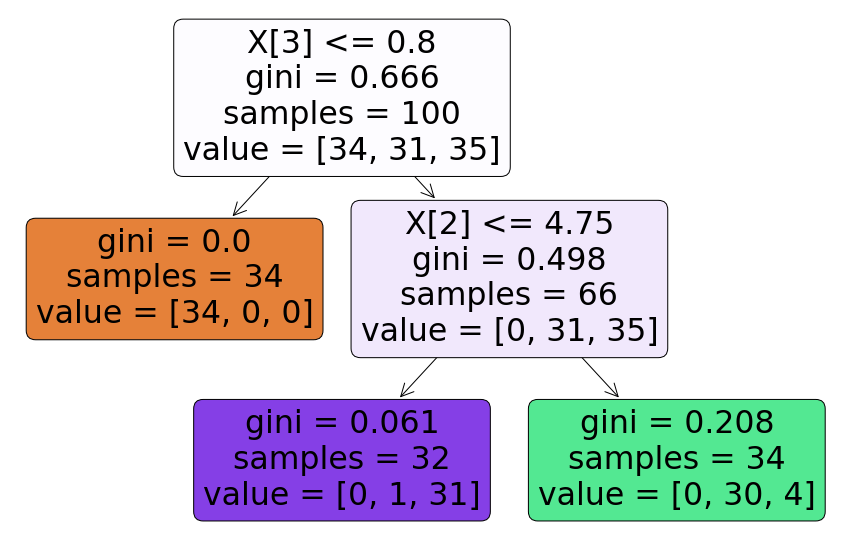

In [27]:
plt.figure(figsize =(15,10) )
tree.plot_tree(DTC,filled = True,rounded = True)

In [28]:
from sklearn.metrics import classification_report

In [29]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        16
           2       1.00      0.90      0.95        21
           3       0.87      1.00      0.93        13

    accuracy                           0.96        50
   macro avg       0.96      0.97      0.96        50
weighted avg       0.97      0.96      0.96        50

